Damit fangen wir immer an ....

In [1]:
%matplotlib inline

# Grundausstattung an Bibliotheken, die wir immer laden
import numpy as np                  # Numerische Operationen, Lineare Algebra
from scipy.stats import *           # Funktionsbibliothek mit statistischen Funktionen
import matplotlib.pyplot as plt     # Visualisierung von Daten/Ergenissen
import pandas as pd                 # Bearbeitung von Tabellen (sog. Data Frames)
import seaborn as sns               # Erweiterte Visualisierung von Daten/Ergebnissen etc.
import warnings                     # Ermöglicht die Deaktivierung von best. Warnmeldungen
import random                       # Damit kann man Zufallszahlen generieren
import os                           # Ermöglicht Zugriff auf das Dateiablagesystem 

# Ein paar Einstellungen, die einem das Leben einfacher machen
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 4]
from IPython.core.pylabtools import figsize
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')

#  Einführung Machine Learing

2. Daten & Preprocessing
   - Daten laden u. explorieren
   - Einfaches Preprocessing


3. Unsupervised Learning
   - Clustering mit Kmeans


4. Supervised Learning
   - Datenset ...
   - Lineare Regression
   - Naive Bayes
   - Logistische Regression
   - Decision Tree / Random Forest
   - Multi-Layer-Perzeptron MLP
   - Support Vector Machines SVM


5. Modellauswahl & -beurteilung
   - Bias-Variance Dilemma
   - Confusion Matrix
   - Accuracy / Precision / Recall

***
## 2. Daten & Preprocessing

### 2.1 Daten laden & explorieren
Zunächst schauen wir uns an, wie man ML Daten in Python gut einlesen, explorieren und vorbereiten kann.  
Dazu verwenden wir die Funktionsbibliothek PANDAS, die wir bereits in der ersten Zelle dieses Notebooks installiert haben.

#### Erste Schritte
Wir laden das sog. MT-Cars Datenset:  
Die Daten stammen aus dem US-amerikanischen Motor Trend-Magazin von 1974.  
Sie beschreiben den Kraftstoffverbrauch sowie 10 Eigenschaften von 32 verschiedenen Oldtimern (Modelle von 1973 bis 1974).

In [16]:
# Einlesen des Datensets (liegt als csv-Datei im lokalen Verzeichnis) in einen Pandas DataFrame (df)
mtcars = pd.read_csv("mtcars.csv", index_col=0, sep=";", decimal=",")
mtcars.head()            # df.head()  zeigt die ersten 5 Datensätze/Zeilen des Dataframes an 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,colour
Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4,blue
Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4,golden
Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1,yellow
Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1,red
Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2,blue


In [17]:
# Umfang unseres df bestimmen:  Anzahl Datensätze (Zeilen), Anzahl Features (Spalten)
mtcars.shape

(33, 12)

In [18]:
# Wir haben hier einen "sprechenden Index", welche Modelle gibt es denn?
mtcars.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E', 'BMW 3.0 CSi'],
      dtype='object')

In [19]:
# Anzeigen der Mermale / Features / Spalten, ihrer Datentypen und Anzahl von fehlenden Werten
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Mazda RX4 to BMW 3.0 CSi
Data columns (total 12 columns):
mpg       32 non-null float64
cyl       33 non-null int64
disp      33 non-null float64
hp        32 non-null float64
drat      33 non-null float64
wt        32 non-null float64
qsec      32 non-null float64
vs        33 non-null int64
am        33 non-null int64
gear      33 non-null int64
carb      33 non-null int64
colour    32 non-null object
dtypes: float64(6), int64(5), object(1)
memory usage: 3.4+ KB


In [20]:
# Mittelwerte aller Merkmale ermitteln:
mtcars.mean()

# funktioniert auch mit ...
# .median()
# .std()
# .var()
# .min()
# .max()


mpg      20.090625
cyl       6.121212
disp    227.375758
hp      146.687500
drat      3.621818
wt        3.217250
qsec     17.848750
vs        0.424242
am        0.424242
gear      3.727273
carb      2.787879
dtype: float64

In [21]:
# Oder wenn man nur die Werte eines bestimmten Merkmals ermitteln möchte:
mtcars.mpg.mean()

20.090624999999996

In [22]:
# Noch einfacher ... eine komplette Beschreibung der Verteilungsparameter des Datensets
# Funktioniert aber nur für numerische Feature (hier z.B. nicht für das Merkmal "colour")
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,33.000000,33.000000,32.000000,33.000000,32.000000,32.000000,33.000000,33.000000,33.000000,33.000000
mean,20.090625,6.121212,227.375758,146.687500,3.621818,3.217250,17.848750,0.424242,0.424242,3.727273,2.787879
std,6.026948,1.798568,123.491941,68.562868,0.545891,0.978457,1.786943,0.501890,0.501890,0.761279,1.596042
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,15.425000,4.000000,120.300000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,19.200000,6.000000,167.600000,123.000000,3.700000,3.325000,17.710000,0.000000,0.000000,4.000000,2.000000
75%,22.800000,8.000000,318.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.000000


#### Visuelle Exploration der Daten

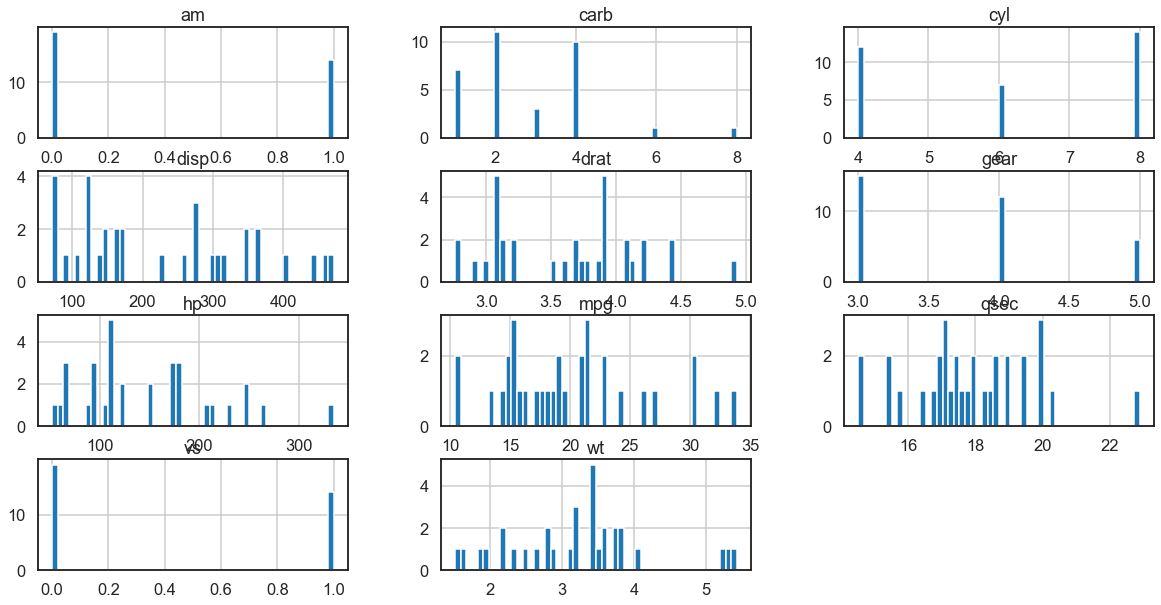

In [23]:
# Visualisierung der numerischen Daten als Histogramm
figsize(20,10)          # stellt die Größe der Abbildung ein (Horizontale, Vertikale)
mtcars.hist(bins=50)    # erzeugt ein Histogramm mit 50er Intervallschritten, einstellbar über bins=xx
plt.show()              # ruft eine Grafik final auf

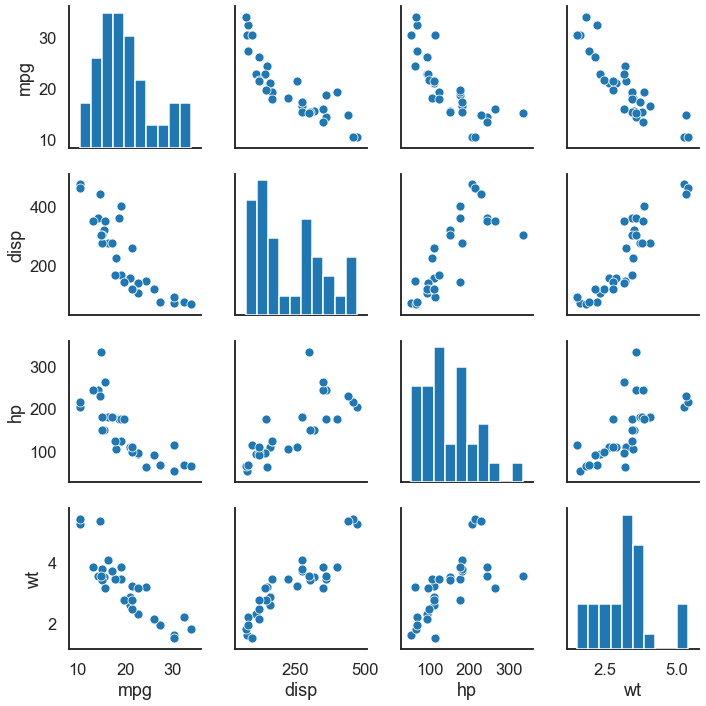

In [24]:
# Advanced Visualisierung: Zeichnet die paarweise Verteilung für ausgewählte Feature
sns.pairplot(mtcars, vars=["mpg","disp","hp","wt"], )

### 2.2 Wichtige Preprocessing Schritte
Leider sind Rohdaten in der Realität selten (oder nie) in einem für ML Algorithmen geigneten Zustand,  
so dass ein PreProcessing und Vorbereiten der Daten erforderlich ist.
Die gängigsten Arbeitsschritte sind ...

+ Fehlende Werte ersetzen oder bereinigen
+ Kategorielle Daten encoden (umwandeln)
+ Daten standardisieren / skalieren


#### Fehlende Werte
... heißen in Python meistens "NA" und leider funktionieren viele ML Algorithmen nicht mit NA Werten im Datenset.  
Welche Strategien kann man anwenden:

+ Löschen von einzelnen Datensätzen mit NA Werten
+ Löschen von einzelnen Merkmalen (Feature) mit NA Werten
+ NA Werte durch Schätzwerte ersetzen => Mittelwert, Median, Modus, Max-Wert, Min-Wert, individueller Wert

In [26]:
# Welche Merkmale haben NA und wieviele davon?
mtcars.isna().sum()

# oder prozentual 
# mtcars.isna().mean()

mpg       1
cyl       0
disp      0
hp        1
drat      0
wt        1
qsec      1
vs        0
am        0
gear      0
carb      0
colour    1
dtype: int64

In [28]:
# Wir ersetzen die fehlenden Werte mit dem jeweiligen Mittelwert des Merkmals
mtcars = mtcars.fillna( mtcars.mean() )

In [37]:
# Sind jetzt alle fehlenden Werte ersetzt worden?
# mtcars.isna().sum()

In [30]:
# OK, dann ersetzen wir noch die Farbe beim Toyota
mtcars.colour = mtcars.colour.fillna("MISSING")

#### Kategorielle Daten umwandeln
Die meisten Algorithmen (fast alle in der Bibliothek Scikit-Learn) können nur numerische Daten verarbeiten.  
Kategorielle Merkmale sind sehr häufig alphanumerische Datentypen: Farbe, Geschlecht, Hersteller, Modell, ...  
Wenn man diese Daten als Feature nutzen möchte, muss man sie in eine numerische Form umwandeln (encoden).  
Zwei gängige Formen sind "Label Encoding" und "One Hot Encoding".  
In der Praxis ist OH-Encoding häufig das bevorzugte Verfahren:  
Dadurch werden die Daten numerisiert, ohne dass eine ungewollte Rangfolge der Ausprägungen ensteht.  
Z.B. bei Merkmal Hersteller: "BMW" = 1, "Mercedes" = 0 ??!

In [38]:
# Welche Farben gibt es in unseren Daten wie häufig?
mtcars.colour.value_counts()

blue       11
red         8
yellow      4
golden      4
green       2
white       2
MISSING     1
orange      1
Name: colour, dtype: int64

In [39]:
# Was machen wir mit dem Feature "Colour"?
# Am besten: "One Hot Encoding"
mtcars = pd.get_dummies(mtcars)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,colour_MISSING,colour_blue,colour_golden,colour_green,colour_orange,colour_red,colour_white,colour_yellow
Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4,0,1,0,0,0,0,0,0
Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4,0,0,1,0,0,0,0,0
Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1,0,0,0,0,0,0,0,1
Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1,0,0,0,0,0,1,0,0
Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2,0,1,0,0,0,0,0,0


#### Daten normalisieren/standardisieren
Sehr viele Algorithmen nutzen mathematische Distanzmaße wie z.B. den Abstand eines Datenpunktes vom Mittelwert.  
Wenn die einzelnen Feature in ihren Ausprägungen unterschiedlich stark skalieren (z.B. Anzahl Zylinder und PS)  
dann "verzerren" diese unterschiedlichen Skalen die Ergebnisse des Algorithmus.

In diesem Fall ... besser man skaliert die Daten einheitlich, d.h. man standardisiert sie.

In [44]:
# Ein Blick auf die statistischen Eckwerte (Lageparameter) unserer Daten
mtcars.describe()[1:3]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,colour_MISSING,colour_blue,colour_golden,colour_green,colour_orange,colour_red,colour_white,colour_yellow
mean,20.090625,6.121212,227.375758,146.687500,3.621818,3.217250,17.848750,0.424242,0.424242,3.727273,2.787879,0.030303,0.333333,0.121212,0.060606,0.030303,0.242424,0.060606,0.121212
std,5.932030,1.798568,123.491941,67.483071,0.545891,0.963048,1.758801,0.501890,0.501890,0.761279,1.596042,0.174078,0.478714,0.331434,0.242306,0.174078,0.435194,0.242306,0.331434


Wir standardisieren unsere Daten mit der sog. Z-Score Methode (Normalisierung)  
Die Funktionsbibliothek Scikit-Learn (ML Methoden) bietet dafür eine geeignete Methode an.

In [54]:
from sklearn.preprocessing import StandardScaler
X = mtcars.copy()                        # jetzt wandeln wir unseren Dataframe in eine Datenmatrix X um
X = X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]   # wir skalieren nur die ersten 11 Feature (nicht die Farben)
scaler = StandardScaler().fit(X)         # Training des Scalers anhand der Datenmatrix
X = scaler.transform(X)                  # Anwenden des Scalers zur Transformation der Datenmatrix X
for i in X[:5]: print("\n",i)            # Pretty Printing der ersten 5 Datensätze


 [ 0.156 -0.068 -0.554 -0.552  0.517 -0.63  -0.802 -0.858  1.165  0.364
  0.771]

 [ 0.156 -0.068 -0.554 -0.552  0.517 -0.361 -0.479 -0.858  1.165  0.364
  0.771]

 [ 0.464 -1.198 -0.982 -0.808  0.424 -0.946  0.44   1.165  1.165  0.364
 -1.138]

 [ 0.224 -0.068  0.252 -0.552 -1.008 -0.002  0.919  1.165 -0.858 -0.97
 -1.138]

 [-0.238  1.061  1.091  0.426 -0.878  0.235 -0.479 -0.858 -0.858 -0.97
 -0.501]


***
## 3. ML Algorithmen in Action

### 3.1 Unsupervised Learning: Clustering mit k-Means
Jetzt machen wir Bekanntschaft mit der "Mutter der Machine Learning Datensets" ... dem Iris-Datenset:  
Der Iris Datensatz besteht aus jeweils 50 Beobachtungen dreier Arten von Schwertlilien (Iris): Iris Setosa, Iris Virginica und Iris Versicolor.  
Es wurden jeweils vier Attribute der Blüten erhoben: Die Länge und die Breite des Sepalum (Kelchblatt) und des Petalum (Kronblatt).


In [29]:
# Datenset laden
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["sorte"] = iris.target

print("Sorten der Iris-Pflanze:", iris.target_names)
print(iris_df.shape)
print("Anzahl der verschiedenen Sorten:\n", iris_df.sorte.value_counts())
print()

iris_df.sample(5)


Sorten der Iris-Pflanze: ['setosa' 'versicolor' 'virginica']
(150, 5)
Anzahl der verschiedenen Sorten:
 2    50
1    50
0    50
Name: sorte, dtype: int64



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sorte
23,5.1,3.3,1.7,0.5,0
53,5.5,2.3,4.0,1.3,1
76,6.8,2.8,4.8,1.4,1
109,7.2,3.6,6.1,2.5,2
95,5.7,3.0,4.2,1.2,1


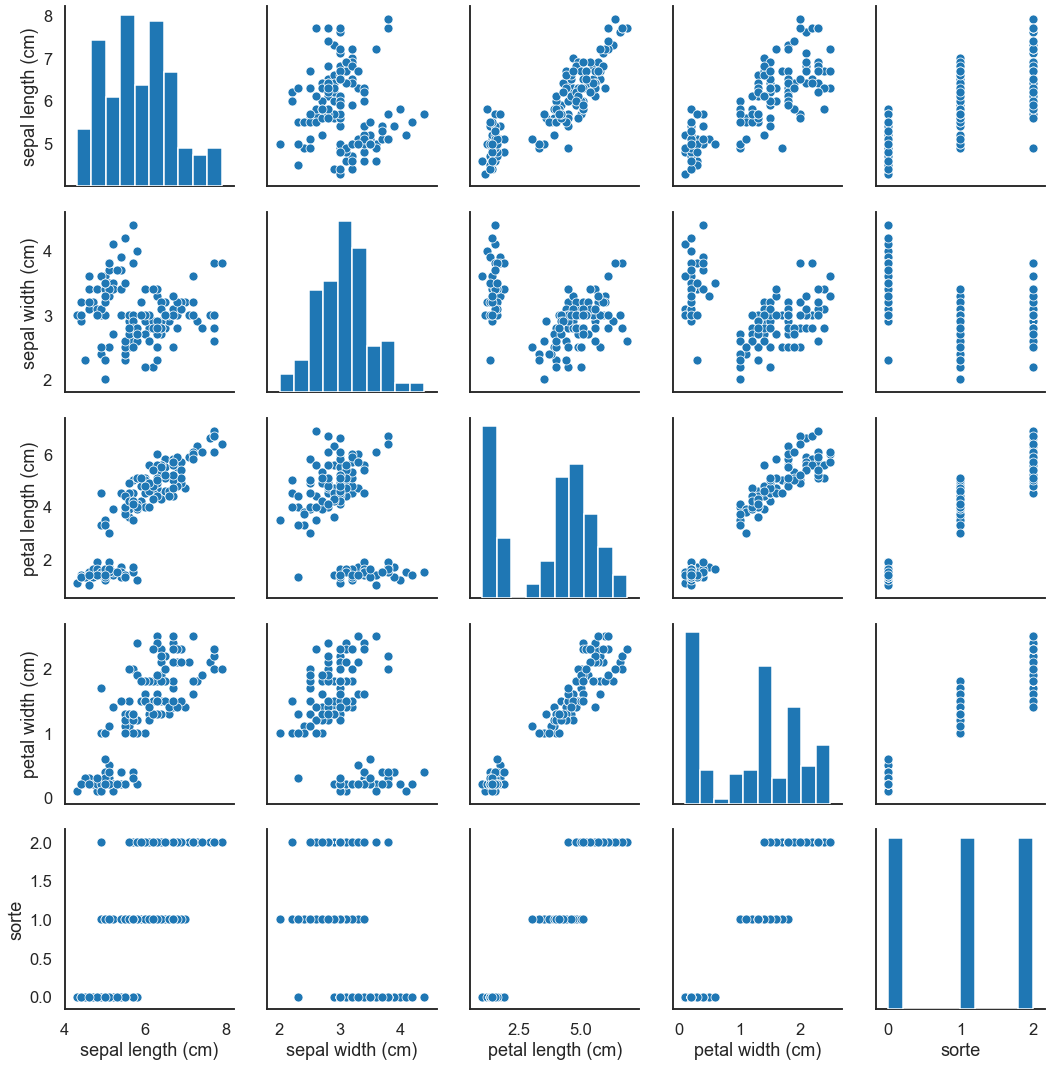

In [10]:
# Da es "nur" vier Feature gibt, kann man die Daten noch gut visualisieren
sns.pairplot(iris_df, size=3)

In [11]:
# k-Means Algorithmus anwenden
from sklearn.cluster import KMeans
X,y = load_iris(return_X_y=True)           # Erzeugt eine Matrix X - ohne die Sortenangabe (y)
km = KMeans(n_clusters=3).fit(X)           # Wendet k-Means auf X an, mit Vorgabe 3 Cluster
km.labels_                                 # k-Means hat für jeden Datenpunkt eine Zuordnung vorgenommen

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

[(0, 'sepal length (cm)'), (1, 'sepal width (cm)'), (2, 'petal length (cm)'), (3, 'petal width (cm)')]


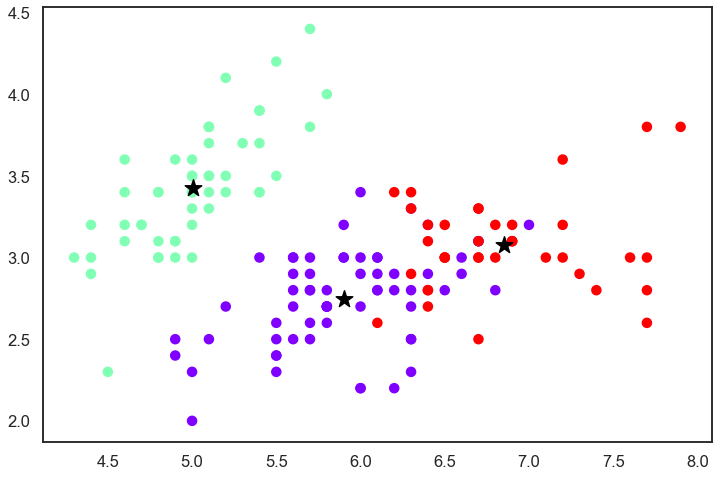

In [13]:
# Visualisierung der Zuordnungen
figsize(12,8)
print(list(enumerate(iris_df.columns[:4])))

i,j = 0,1

plt.scatter(X[:,i], X[:,j], c=km.labels_, cmap="rainbow")
plt.scatter(km.cluster_centers_[:,i], km.cluster_centers_[:,j], c='k', marker='*', s=300, ) # Scatterplot mit Centroids
plt.show()

Da wir das Modell jetzt trainiert haben, können wir es verwenden, um NEUE Datensätze zu beurteilen:

In [26]:
# Wir pflücken drei neue Schwertlilien, vermessen Ihre Blätter... 
iris_New = np.array([[5, 2.4, 6.2, 1.8],
                     [3, 3, 4, 3],
                     [4.2, 7, 4, 1.2]])

#  und nutzen jetzt unser trainiertes Modell km zur Einordnung
km.predict(iris_New)

array([2, 0, 1])

### 3.2 Supervised Learning: Lineare Regression
Das Boston Housing Dataset basiert auf U.S. Cencus Daten und beschreibt anhand von 14 Merkmalen 506 Bezirken der Boston Metropolitan Area.  
Uns interessiert vor allem der durchschnittliche Preis eines eigentümerbewohnten Hauses in 1.000 USD.  
Das entsprechende Feature in unserem Datensatz ist "MEDV" (das ist unser y).
Welche unabhängigen Variablen (Prediktoren) liefern welchen Beitrag zur Erklärung des MEDV?

In [34]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["MEDV"] = boston.target

print(df.shape)
df.sample(5)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
216,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51,23.3
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65,24.3
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9


Wir erstellen uns eine Datenmatrix X (ohne MEDV) und einen Target-Vektor y (MEDV).  
Dann trainieren wir ein lineares Regressionsmodell auf X und y.

In [127]:
from sklearn.linear_model import LinearRegression
X,y = load_boston(return_X_y=True)

lr = LinearRegression().fit(X,y)
score = lr.score(X,y)

print(f"Anteil der erklärbaren Varianz, R² = {score:.2f}")
print()
for i in enumerate(zip(df.columns,lr.coef_)): print(i)

Anteil der erklärbaren Varianz, R² = 0.74

(0, ('CRIM', -0.10801135783679539))
(1, ('ZN', 0.04642045836687953))
(2, ('INDUS', 0.020558626367068917))
(3, ('CHAS', 2.6867338193448442))
(4, ('NOX', -17.766611228299986))
(5, ('RM', 3.8098652068092282))
(6, ('AGE', 0.0006922246403431768))
(7, ('DIS', -1.47556684560025))
(8, ('RAD', 0.30604947898516427))
(9, ('TAX', -0.012334593916574021))
(10, ('PTRATIO', -0.9527472317072921))
(11, ('B', 0.00931168327379375))
(12, ('LSTAT', -0.5247583778554881))


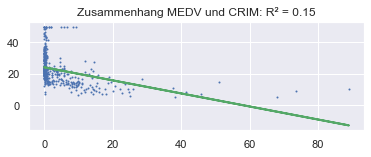

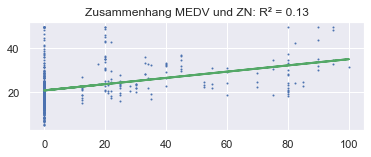

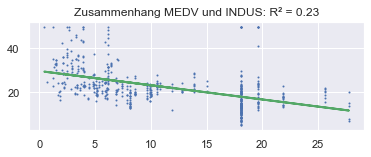

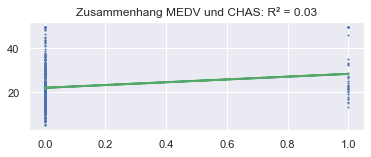

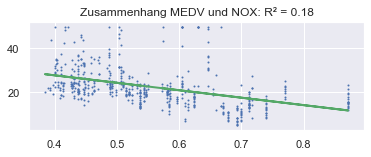

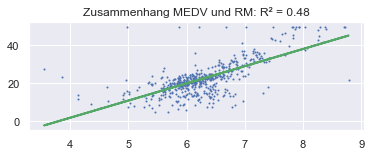

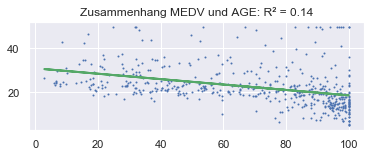

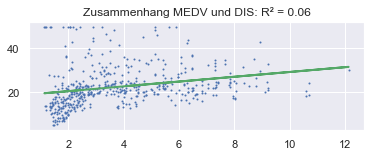

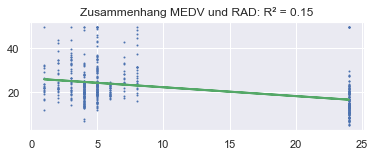

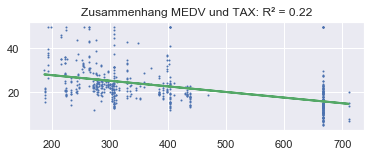

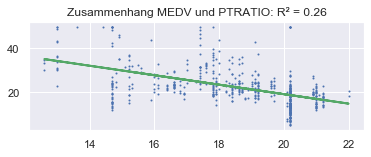

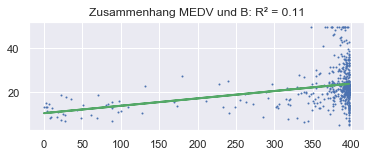

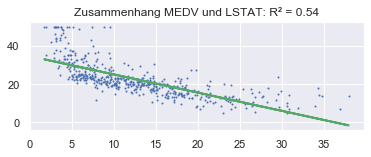

In [126]:
# Betrachtung der einzelnen Variablen im Zusammenhang mit MEDV
# Entspricht der univariaten Regression
for i in range(len(df.columns)-1):
# for i in range(6):        # wir nehmen nur die ersten 5 Variablen
    
    figsize(6,2)
    X = df.iloc[:,i].values[:,np.newaxis]
    y = df.iloc[:,-1].values[:,np.newaxis]
    lr2 = LinearRegression().fit(X,y)
    plt.scatter(X, y, color='b', s=1)
    plt.plot(X, lr2.predict(X), color='g', lw=2)
    plt.title(f"Zusammenhang MEDV und {df.columns.to_list()[i]}: R² = {lr2.score(X,y):.2f}", fontsize=12)
    plt.show()

### 3.3 Supervised Learning: Classification

#### 3.3.1 Naive Bayes

#### 3.3.2 Logistische Regression

#### 3.3.3 Decision Tree / Random Forest

#### 3.3.4 Neuronales Netz: MLP Multi-Layer-Perzeptron

***
## 4. Evaluation und Auswahl von Modellen 

# Parkplatz

In [51]:
mtcars = pd.read_csv("mtcars.csv", index_col=0, sep=";", decimal=",")
mtcars = mtcars.fillna(mtcars.mean())
mtcars.colour = mtcars.colour.fillna("MISSING")

In [36]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'klass']
dataframe = pandas.read_csv(url, names=names, )
dataframe.index.name="idx"
array = dataframe.values
print(dataframe.shape)
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

df = pd.DataFrame(rescaledX, columns=names[:8])
df.index.name="idx"
df = df.merge(dataframe.klass, on="idx" )
print(df.shape)
df


(768, 9)
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]
(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,klass
idx,,,,,,,,,
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0


In [ ]:
dataframe.klass

Variablen im Boston Housing Dataset:
+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per USD 10,000
+ PTRATIO - pupil-teacher ratio by town
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
+ LSTAT - % lower status of the population
+ MEDV - Median value of owner-occupied homes in USD 1000's